In [1]:
import pandas as pd
import numpy as np
import pickle
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('all_mutation_accuracy_scores.db', 'rb') as accuracy_scores:
    mutated_scores = pickle.load(accuracy_scores)

In [3]:
def prepare_df(scores):
    df_train = pd.DataFrame(columns=['Training Accuracy', 'model', 'Mutation Percentage'])
    df_test = pd.DataFrame(columns=['Test Accuracy', 'model', 'Mutation Percentage'])
    for ratio in range(1, 11):
        for model in scores[str(ratio)]:
            if model == 'singlerf': model_name = 'singleRF'
            elif model == 'hierarchicalrf': model_name = 'hierarchicalRF'
            elif model == 'linearsvm': model_name = 'hierarchicalSVM'
            for score in scores[str(ratio)][model]['train']:
                df_train.loc[len(df_train)] = [score*100, model_name+' error', str(ratio/10)]
            for score in scores[str(ratio)][model]['test']:
                df_test.loc[len(df_test)] = [score*100, model_name+' error', str(ratio/10)]
    return df_train, df_test

In [4]:
train, test = prepare_df(mutated_scores)

In [5]:
def plot_results(accuracies, error_df, y_error, y_label, save=False, filename='accuracies'):
    fig = plt.figure(figsize=(11, 10))
    sns.boxplot(x='Mutation Percentage', y=y_error, data=error_df, hue='model')
    plt.plot(accuracies[0][0], label='singleRF acc', marker='o', linestyle='-')
    plt.plot(accuracies[0][1], label='hierarchicalRF acc', marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)))
    plt.plot(accuracies[0][2], label='hierarchicalSVM acc', marker='s', linestyle=(0, (1, 1)))
    plt.ylabel(y_label)
    plt.xlabel('Mutation Percentage')
    plt.legend(loc='center right')
    if save:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [6]:
def get_accuracy(data):
    mean_accs = {}
    for ratio in range(1, 11):
        for model in data[str(ratio)]:
            mean_accs.setdefault(model+' '+'test', [])
            mean_accs.setdefault(model+' '+'train', [])
            mean_accs[model+' '+'test'].append(statistics.mean(data[str(ratio)][model]['test'])*100)
            mean_accs[model+' '+'train'].append(statistics.mean(data[str(ratio)][model]['train'])*100)
    return mean_accs            

In [7]:
acc_scores = get_accuracy(mutated_scores)

In [8]:
acc_list = [[acc_scores['singlerf test'], acc_scores['hierarchicalrf test'], acc_scores['linearsvm test']]]

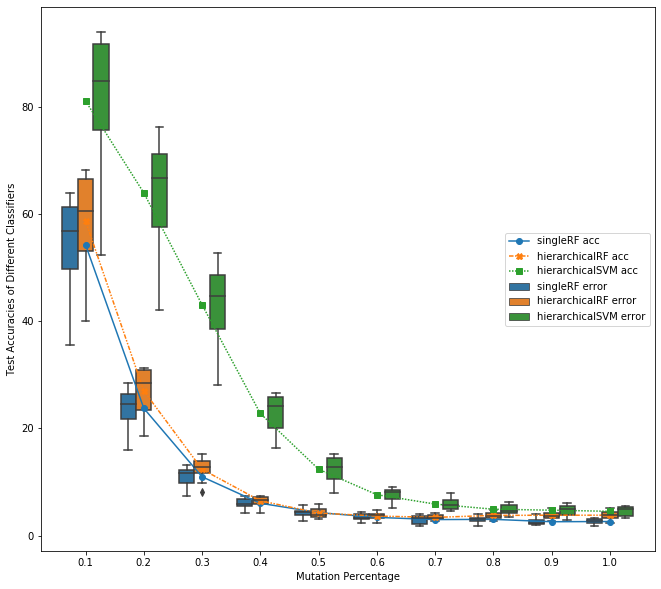

In [9]:
plot_results(acc_list, test, 'Test Accuracy', 'Test Accuracies of Different Classifiers', True, 'mutation_test')

In [10]:
acc_list = [[acc_scores['singlerf train'], acc_scores['hierarchicalrf train'], acc_scores['linearsvm train']]]

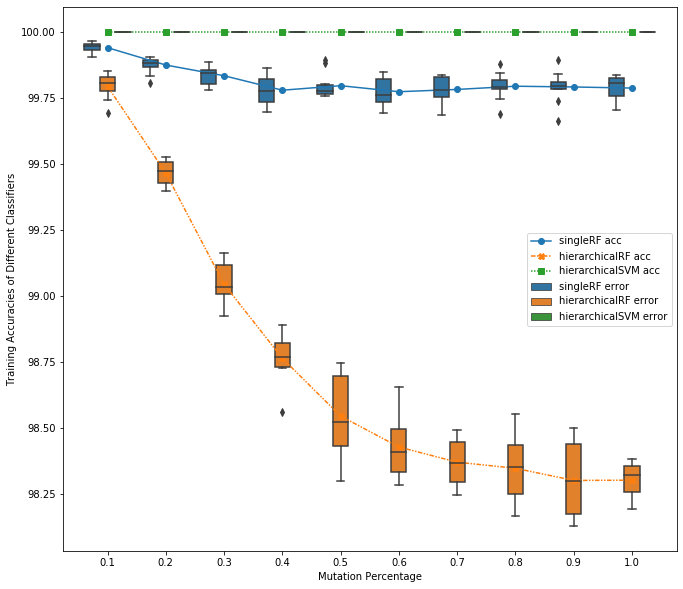

In [11]:
plot_results(acc_list, train, 'Training Accuracy', 'Training Accuracies of Different Classifiers', True, 'mutation_train')